In [10]:
import json, csv, os, ast
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import scipy as sp
from IPython.display import display, HTML
import xml.etree.ElementTree
import seaborn as sns
import pylab as plt
from matplotlib.backends.backend_pdf import PdfPages
from collections import Counter

%matplotlib inline

sns.set_style('whitegrid')

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [11]:
gold_dict = ['HIGH', 'LOW']

<h3>Alpha</h3>

In [12]:
# S100 
df = pd.read_csv('../../Task/BigTask/Parsed-results_S100.csv')

offs = 5
n_bins = 1001


df = df[df["doc_id"].isin(gold_dict) == False]
df = df.replace('LOW', 0).replace('LIE', 1).replace('FALSE', 2).replace('BARELYTRUE', 3).replace('HALFTRUE', 4).replace('MOSTLYTRUE', 5).replace('TRUE', 6).replace('HIGH', 7)
df = df[['doc_id', 'S100_rel', 'worker_id', 'rel']]

df.set_index(['doc_id', 'rel'], inplace=True)

####
%run "./pers_scr/alpha"

df_agreement = pd.DataFrame(columns=['dataset', 'trec_hue', 'agr_measure', 'agr_score'])

combs = [1, 2, 3, 4, 5, 6]
which = 'interval'

for comb in combs:
    print('\nworking on S100 -- {}'.format(comb))
    
    if comb != 'all':
        sub_comb = df.loc[df.index.get_level_values('rel') == comb]
    else:
        sub_comb = df.copy()
         
    sub_top = sub_comb.copy()
    pivoted = sub_top.reset_index().pivot_table(index = 'worker_id', columns='doc_id', values = 'S100_rel')
    #display(pivoted)
    
    # deal with shitty format
    pivoted.replace(np.nan, '*', inplace=True)
    data =  pivoted.as_matrix()
    data = ["".join("{}".format(r)).replace("'*'", "*").replace("\n", "").replace("[", "").replace("]", "")   for r in data ]
    array = [d.split() for d in data]

    alpha = krippendorff_alpha(array, interval_metric, missing_items='*')

    df_agreement.loc[len(df_agreement)] = np.array(["S100", comb, 'alpha', alpha])
    
    #print(alpha)
    #assert False

df_agreement.set_index(['trec_hue'], inplace=True)
display(df_agreement.head())
#assert False

df_agreement_S100_alpha = df_agreement.copy()


working on S100 -- 1

working on S100 -- 2

working on S100 -- 3

working on S100 -- 4

working on S100 -- 5

working on S100 -- 6


,dataset,agr_measure,agr_score
trec_hue,,,
1,S100,alpha,0.021593361027925972
2,S100,alpha,-0.039353581637884716
3,S100,alpha,-0.0005336719086146413
4,S100,alpha,-0.005909619043129366
5,S100,alpha,0.032295866294515974


In [15]:
# S6
df = pd.read_csv('../../Task/BigTask/Parsed-results_S6.csv')

offs = 5
n_bins = 1001


df = df[df["doc_id"].isin(gold_dict) == False]
df = df.replace('LOW', 0).replace('LIE', 1).replace('FALSE', 2).replace('BARELYTRUE', 3).replace('HALFTRUE', 4).replace('MOSTLYTRUE', 5).replace('TRUE', 6).replace('HIGH', 7)
df = df[['doc_id', 'S6_rel', 'worker_id', 'rel']]

df.set_index(['doc_id', 'rel'], inplace=True)

####
%run "./pers_scr/alpha"

df_agreement = pd.DataFrame(columns=['dataset', 'trec_hue', 'agr_measure', 'agr_score'])

combs = [1, 2, 3, 4, 5, 6]
which = 'interval'

for comb in combs:
    print('\nworking on S6 -- {}'.format(comb))
    
    if comb != 'all':
        sub_comb = df.loc[df.index.get_level_values('rel') == comb]
    else:
        sub_comb = df.copy()
         
    sub_top = sub_comb.copy()
    pivoted = sub_top.reset_index().pivot_table(index = 'worker_id', columns='doc_id', values = 'S6_rel')
    #display(pivoted)
    
    # deal with shitty format
    pivoted.replace(np.nan, '*', inplace=True)
    data =  pivoted.as_matrix()
    data = ["".join("{}".format(r)).replace("'*'", "*").replace("\n", "").replace("[", "").replace("]", "")   for r in data ]
    array = [d.split() for d in data]

    alpha = krippendorff_alpha(array, nominal_metric, missing_items='*')

    df_agreement.loc[len(df_agreement)] = np.array(["S6", comb, 'alpha', alpha])
    
    #print(alpha)
    #assert False

df_agreement.set_index(['trec_hue'], inplace=True)
display(df_agreement.head())
#assert False

df_agreement_S6_alpha = df_agreement.copy()


working on S6 -- 1

working on S6 -- 2

working on S6 -- 3

working on S6 -- 4

working on S6 -- 5

working on S6 -- 6


,dataset,agr_measure,agr_score
trec_hue,,,
1,S6,alpha,0.05111829944547153
2,S6,alpha,-0.021137593594780624
3,S6,alpha,0.007723549014162945
4,S6,alpha,0.0006993144748248525
5,S6,alpha,-0.02126011361680158


<h3>Plot</h3>

In [16]:
df_agre = pd.concat([df_agreement_S100_alpha, df_agreement_S6_alpha])
display(df_agre.head())
df_agre.to_pickle('./pers_scr/agreement.pickle')

,dataset,agr_measure,agr_score
trec_hue,,,
1,S100,alpha,0.021593361027925972
2,S100,alpha,-0.039353581637884716
3,S100,alpha,-0.0005336719086146413
4,S100,alpha,-0.005909619043129366
5,S100,alpha,0.032295866294515974


,trec_hue,dataset,agr_measure,agr_score
0,1,S100,alpha,0.021593
1,2,S100,alpha,-0.039354


S6


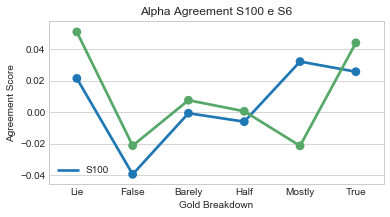

In [45]:
df_agreement = pd.read_pickle('./pers_scr/agreement.pickle').reset_index()
df_agreement = df_agreement.replace('all', 7)
df_agreement["trec_hue"] = df_agreement["trec_hue"].astype(int)
df_agreement["agr_score"] = df_agreement["agr_score"].astype(float)

display(df_agreement.head(2))

datasets = np.unique(df_agreement['dataset'])


print(d)

aux1 = df_agreement[df_agreement['dataset'] == 'S100']
aux2 = df_agreement[df_agreement['dataset'] == 'S6']

pages = PdfPages("../../plots/BigTask/Agreement/Agreement_{}.pdf".format(d) )
ax = sns.pointplot(x = "trec_hue", y = "agr_score", hue = 'agr_measure', 
                   data= aux1, aspect = 3, scale = 1, linewidth = .2, label = "S100"
                       #linestyles=p_linestyles,
                       #palette = p_colors, markers = p_markers,
                      )
ax2 = sns.pointplot(x = "trec_hue", y = "agr_score", color = '#55A868', 
                   data= aux2, aspect = 3, scale = 1, linewidth = .2, label = "S6"
                       #linestyles=p_linestyles,
                       #palette = p_colors, markers = p_markers,
                      )
ax.legend(['S100']);
ax2.set_xticklabels(['Lie', 'False', 'Barely', 'Half', 'Mostly', 'True'])
ax2.set(title = "Alpha Agreement S100 e S6", xlabel= "Gold Breakdown", ylabel = "Agreement Score")
pages.savefig(bbox_inches='tight');pages.close()
plt.show()

,trec_hue,dataset,agr_measure,agr_score
0,1,S100,alpha,0.021593
1,2,S100,alpha,-0.039354


S100


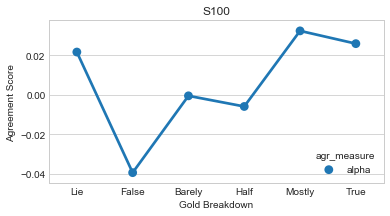

S6


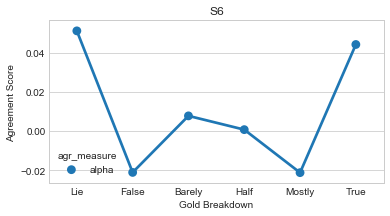

In [46]:
df_agreement = pd.read_pickle('./pers_scr/agreement.pickle').reset_index()
df_agreement = df_agreement.replace('all', 7)
df_agreement["trec_hue"] = df_agreement["trec_hue"].astype(int)
df_agreement["agr_score"] = df_agreement["agr_score"].astype(float)

display(df_agreement.head(2))

datasets = np.unique(df_agreement['dataset'])

for d in datasets:
    print(d)

    aux = df_agreement[df_agreement['dataset'] == d]
    
    pages = PdfPages("../../plots/BigTask/Agreement/Agreement_{}.pdf".format(d) )
    ax = sns.pointplot(x = "trec_hue", y = "agr_score", hue = 'agr_measure', 
                       data= aux, aspect = 3, scale = 1, linewidth = .2,
                           #linestyles=p_linestyles,
                           #palette = p_colors, markers = p_markers,
                          )
    ax.set_xticklabels(['Lie', 'False', 'Barely', 'Half', 'Mostly', 'True', 'All'])
    ax.set(title = d, xlabel= "Gold Breakdown", ylabel = "Agreement Score")
    pages.savefig(bbox_inches='tight');pages.close()
    plt.show()